In [3]:
import urllib
import re

ins = "wfc3-uvis-acs-wfc"
targ = "2808"
filt = "multi"
exteng = "1"

url = "https://archive.stsci.edu/hlsps/hugs/ngc"+targ+"/hlsp_hugs_hst_"+ins+"_ngc"+targ+"_"+filt+"_v1_catalog-meth"+exteng+".txt"
file = urllib.request.urlopen(url)   

ptr = 1
hd = []
        
hd.append("Nan") 
hd.append("X")  
hd.append("Y")

with open(r"D:\IIT material\Krittika python project\NGC"+targ+" data.txt", 'w') as f1, open(r"D:\IIT material\Krittika python project\NGC"+targ+" header.txt", 'w') as f2:
    for line in file:
        line = line.decode("utf-8")
        f2.write(line)
        if ptr > 54:    
            f1.write(re.sub('[\t ]+',' ', line))
        ptr += 1        

with open(r"D:\IIT material\Krittika python project\NGC"+targ+" header.txt", 'r') as fr:
    lines = fr.readlines()

    for i in range(14, 45):
        hd.append(lines[i])

    hd.append(lines[45])
    hd.append(lines[46])
    hd.append(lines[47])
    hd.append(lines[48])
    hd.append(lines[49])

print(hd)

for i in range(0, 39):
    print(hd[i])

['Nan', 'X', 'Y', '# Col.  3: F275W calibrated magnitude\n', '# Col.  4: F275W photometric RMS\n', '# Col.  5: F275W quality-fit parameter\n', '# Col.  6: F275W sharp parameter \n', '# Col.  7: Number of F275W exposures the source is found in [99: saturated star]\n', '# Col.  8: Number of F275W exposures the source is well measured [99: saturated star]\n', '# Col.  9: F336W calibrated magnitude\n', '# Col. 10: F336W photometric RMS\n', '# Col. 11: F336W quality-fit parameter\n', '# Col. 12: F336W sharp parameter\n', '# Col. 13: Number of F336W exposures the source is found in [99: saturated star]\n', '# Col. 14: Number of F336W exposures the source is well measured [99: saturated star]\n', '# Col. 15: F438W calibrated magnitude\n', '# Col. 16: F438W photometric RMS\n', '# Col. 17: F438W quality-fit parameter\n', '# Col. 18: F438W sharp parameter \n', '# Col. 19: Number of F438W exposures the source is found in [99: saturated star]\n', '# Col. 20: Number of F438W exposures the source is

<Figure size 1080x1080 with 0 Axes>

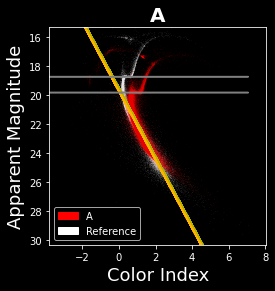

The distance modulus is    :  0.23662969652844268
The ratio of distances is  :  0.8967555241875975
The distance of the cluster:  9.326257451551015  kpc
Magnitude limit is         :  19.8278
the difference between the original slopes : 0.1653518399628906


In [5]:
import numpy as np
import matplotlib.pyplot as plt
# For legend customization
import matplotlib.patches as mpatches
# For curve fitting
from scipy import optimize

# Finding the magnitude limits
def magCutter(y,ep): # Takes the entire y as parameters   
    for i in range(y.size -1):
        if i > 0 :
            d1 = abs(y[i] - y[i-1]) # Difference 1
            d2 = abs(y[i+1] - y[i]) # Difference 2
            if d1 <= ep and d2 <= ep and y[i] < np.median(y) : # Condition for constant y, must lie in upper half
                return y[i] #The constant y

# The curve fitted is a straight line
def func(x, a, b):
    return a*x + b

name = "A"

# Loading data from file
fname = r"D:\IIT material\Krittika python project\NGC2080 data.txt"  

# To ensure same color index, we use columns 8 and 20, ensures horizontal subgiant branch
x1   = np.loadtxt(fname, usecols=(8))
x2   = np.loadtxt(fname, usecols=(20))
prob = np.loadtxt(fname, usecols=(32))
# Removing garbage & including only the stars which have more than 90% membership probability
b = (x1 > 0) & (x2 > 0) & (prob>90)
y = x1[b]
x = x1[b] - x2[b] 

# Reference Data
ref   = r"D:\IIT material\Krittika python project\DATA NGC 5272.txt"
xr1   = np.loadtxt(ref, usecols=(8))
xr2   = np.loadtxt(ref, usecols=(20))
probr = np.loadtxt(ref, usecols=(32))
br = (xr1 > 0) & (xr2 > 0) & (probr>90)
yr = xr1[br]
xr = xr1[br] - xr2[br] 

# Can be removed as it works only for clusters having a wikipedia page
"""
#WEB-SCRAPING
#START
import requests
from bs4 import BeautifulSoup
url0 = 'https://en.wikipedia.org/wiki/NGC_' + clusName
url = requests.get(url0).text
soup = BeautifulSoup(url,"lxml")
soup.prettify()
table = soup.find('table',{'class':'infobox'})
tags = table.find_all('tr')
a = []
for tr in tags:
    cols = tr.find_all('td')
    for tds in cols:
        a.append(str('{:1}'.format(str(tds.text))))
s = a[5]
start = s.find('(')
# The blank space after 10.4 isn't ' ' but it's &nbsp 
ActualDistance = float((s[start+1:start + 5])) # As kpc
#END
"""
# Finding the limits of the plot
xmin = max(np.amin(x),np.amin(xr))
ymin = max(np.amin(y),np.amin(yr))
xmax = max(np.amax(x),np.amax(xr))
ymax = max(np.amax(y),np.amax(yr))

"""THE ACTUAL MATCHING LOGIC"""
cutr = 18.735 # Hardcoded the cut of the reference as reference remains the same 
# Value of epsilon, difference parameter

ep = 0
# Finding the cut, if none is returned increase the value of epsilon, and call again
while True: 
    if ep > 0.1:
        cut = cutr
        break
    cut = magCutter(y,ep)
    if type(cut) == type(None):
        ep += 0.01
    else:
        break

xMS = x[(y > cut)]
yMS = y[(y > cut)]
xrMS = xr[(yr > cutr)]
yrMS = yr[(yr > cutr)]

# Calculating the distance between the two lines, rotate about mean, then y distance

p, pcov   = optimize.curve_fit(func, xMS, yMS)
pr, prcov = optimize.curve_fit(func, xrMS, yrMS)

m = p[0]
mr = pr[0]
c = p[1]
cr = pr[1]

slope = (m + mr)/2 #The slope of the new line , assumed to be the average of both slopes

# The points about which rotation is to be done
Yr = Y0 = (ymin + ymax)/2 # Lines are bound by these 2 horizontal line
Xr = (Yr - cr)/mr
X0 = (Y0 - c)/m

# The new lines
p[0]  = slope
pr[0] = slope
p[1]  = Y0 - slope * X0
pr[1] = Yr - slope * Xr

mew = pr[1] - p[1] # The distance modulus

#Calculations
ratio    = pow(10, -mew/5)
distance = ratio * 10.4

c1 = np.full(xr.shape,cut)
c2 = np.full(xr.shape,cutr)
"""END"""

# The plot customization
factor = 0.00005
area = np.pi * factor # Area of each plotted point
colors = [[1, 0, 0]] # Given red color to each point
# To change background color
plt.figure(figsize = (15, 15))
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) # nrows, ncols, index
ax.set_facecolor('xkcd:black')
# Making it look square
plt.gca().set_aspect(aspect = (abs((xmax-xmin))/abs((ymax-ymin))))
# The Scatter Plots
cmdr = plt.scatter(xr, yr, s = area, c = [[1,1,1]], label='Reference')
cmd  = plt.scatter(x, y, s = area, c = colors, label=name)
# The Lines
plt.plot(x , func(x, p[0], p[1])   , c = [0.7,0.7,0])
plt.plot(xr, func(xr, pr[0], pr[1]), c = [1,0.7,0])
# The cut lines
plt.plot(xr,c1,c = [0.5,0.5,0.5])
plt.plot(xr,c2,c = [0.5,0.5,0.5])

plt.title(name, fontsize = 20, fontweight="bold")
plt.ylabel("Apparent Magnitude", fontsize = 18)
plt.xlabel("Color Index", fontsize = 18)

# Inverting the y-axis and setting the limits
plt.gca().invert_yaxis()
#The limits on the axes (kept same as that of the reference)
plt.xlim(xmin,xmax) 
plt.ylim(ymax,ymin) 
# Custom legend
red_patch   = mpatches.Patch(color='red', label=name)
white_patch = mpatches.Patch(color='white', label='Reference')
plt.legend(handles=[red_patch,white_patch])
plt.show()

print("The distance modulus is    : ",mew)
print("The ratio of distances is  : ",ratio)
print("The distance of the cluster: ",distance," kpc")
#print("The % error is             : ",(abs(ActualDistance - distance)/ActualDistance)*100,"%")
print("Magnitude limit is         : ",cut)
print("the difference between the original slopes :",abs(m - mr))

NameError: name 'name' is not defined

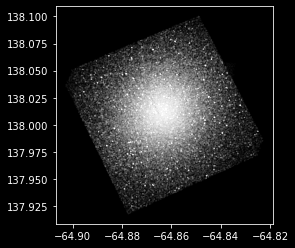

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#clusName = input("Enter the numeric part of the cluster's name  : ")
#name = "NGC"+clusName
fname = r"D:\IIT material\Krittika python project\NGC2080 data.txt"  

""" Reconstructing the Image """
# Loading data
y = np.loadtxt(fname, usecols=(33))
x = np.loadtxt(fname, usecols=(34))
m = np.loadtxt(fname, usecols=(20)) #F606W

su= n = 0
for i in m:
    if i > 0:
        su += i
        n  += 1
avg = su/n
# Wherever magnitude isn't available, replace by the average magnitude.
m = np.where(m < 0, avg , m)

# Plot customisation
factor = pow(10,5)
# Area of each plotted point accounted by the magnitude
area = pow(10, -0.4*m) * factor
colors = [[1,1,1]]

# The plot (RA vs dec)
plt.style.use('dark_background')
# Making the aspect ratio equal
plt.scatter(x, y, s = area, c = colors)
plt.gca().set_aspect(aspect = (abs(np.amax(x)-np.amin(x)))/abs(np.amax(y)-np.amin(y)))

plt.title(name, fontsize = 20, fontweight="bold")
plt.ylabel("y", fontsize = 18) 
plt.xlabel("x", fontsize = 18)
plt.show()